In [1]:
import numpy as np
from dcTMD.dcTMD import ForceEstimator
from dcTMD.storing import ForceSet, load
import dcTMD


In [2]:
# define variables
velocity = 0.001
res = 1
verbose = True
temperature = 290

# create forceset

load pullf files either with a file that contains the names of the pullf files and np.loadtxt() or the function dcTMD.io.load_pullf() which takes either a glob pattern or a file containing the pullf file names as argument.   

In [3]:
pullf_files = '../../tests/testdata/pullf_filenames.dat'
pullf_files = '../../tests/testdata/*pullf.xvg'
filenames = dcTMD.io.load_pullf(pullf_files)

filenames


file ../../tests/testdata/*pullf.xvg not found. using glob.glob(../../tests/testdata/*pullf.xvg)


['../../tests/testdata/t_middle_32_pullf.xvg',
 '../../tests/testdata/t_middle_03_pullf.xvg',
 '../../tests/testdata/t_middle_34_pullf.xvg',
 '../../tests/testdata/t_middle_24_pullf.xvg',
 '../../tests/testdata/t_middle_21_pullf.xvg',
 '../../tests/testdata/t_middle_04_pullf.xvg',
 '../../tests/testdata/t_middle_29_pullf.xvg',
 '../../tests/testdata/t_middle_16_pullf.xvg',
 '../../tests/testdata/t_middle_30_pullf.xvg',
 '../../tests/testdata/t_middle_19_pullf.xvg',
 '../../tests/testdata/t_middle_01_pullf.xvg',
 '../../tests/testdata/t_middle_28_pullf.xvg',
 '../../tests/testdata/t_middle_26_pullf.xvg',
 '../../tests/testdata/t_middle_31_pullf.xvg',
 '../../tests/testdata/t_middle_09_pullf.xvg',
 '../../tests/testdata/t_middle_17_pullf.xvg',
 '../../tests/testdata/t_middle_25_pullf.xvg',
 '../../tests/testdata/t_middle_05_pullf.xvg']

In [4]:
# create ForceSet instance
forceset = ForceSet(velocity=velocity,
                  resolution=res,
                  verbose=False,
                  )
forceset


ForceSet(velocity=0.001)

In [5]:
# fit/fill forceset
forceset.fit(filenames)
# save workset
# For big datasets it is recommended to save the force/workset instance, since the creation is time consuming.
#dcTMD.storing.save('my_workset', workset)


Loading force files: 100%|██████████| 18/18 [00:00<00:00, 56.30it/s]

integrating forceset --> workset
(18, 20001)


ForceSet(velocity=0.001)

One of the underlying assumptions of dcTMD is a normal distributed work. To check if this true different tests can be used. For example the Sahpiro-Wilk test or the Kolmogorov-Smirnov test. Both are implemented in scipy.stats

In [6]:
# check if work distribution follows a normal distribution
import math
import numpy as np
from scipy.stats import kstest, shapiro, probplot, norm
from matplotlib import cm

index = [500, 1000, 1500]

# do a probplot
fig, ax = plt.subplots()
cm_subsectionJ = np.linspace(0, 1, 7)
lcolor = [cm.Dark2(x) for x in cm_subsectionJ]
for i, p in enumerate(index):
    res = probplot(workset.work_[:,p], plot=ax, fit=True)
    ax.get_lines()[i*2].set_color(lcolor[i])
    # Shapiro-Wilk Test
    shapiro_test = shapiro(workset.work_[:,p])
    print(f'shapiro wilkins results at x={x[p]} is {shapiro_test}')
    # Kolmogorov-Smirnov Test
    kstest_test = kstest(workset.work_[:,p], 'norm')
    
    print(f'Kolmogorov-Smirnov results at x={x[p]} is {kstest_test}')

NameError: name 'plt' is not defined

Estimate dcTMD properties from force set via auto correlation function 

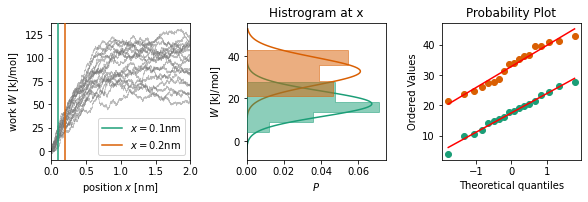

In [ ]:
index = [1000, 2000]
fig, axs = plot_worknormalitychecks(forceset.position_, forceset.work_, index)


In [ ]:
## load force
# force = load('my_force_set')
# Instantiate a ForceEstimator instance and fit it with the ForceSet
# instance
force_estimator = ForceEstimator(temperature=290.15)
force_estimator.fit(forceset)

Calculating dissipative work...


ForceEstimator(temperature=290.15)

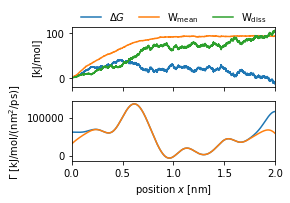

In [ ]:
def plot_dcTMD_results(x, workestimator, friction):
    """Plot dcTMD results in two subplots."""
    fig, axs = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=fig_sizehalfA4width(),)
    plot_dG_Wdiss(x, workestimator, axs[0])
    plot_Gamma(x, friction, axs[1])
    axs[0].legend(loc='lower left', mode='expand',
                  bbox_to_anchor=(0, 0.9, 1, 0.2),
                  frameon=False,
                  ncol=3,)
    axs[0].set_xlabel("")
    plt.tight_layout()
    return fig, axs

x = force_estimator.force_set.position_
from dcTMD.utils.smoothing import gaussfilter_friction
smooth_friction_ = gaussfilter_friction(force_estimator.friction_,
                                        x,
                                        0.1,
                                        )
fig, axs = plot_dcTMD_results(x, force_estimator, smooth_friction_)
smooth_friction_ = gaussfilter_friction(force_estimator.friction_,
                                        x,
                                        0.1,
                                        'constant')
plot_Gamma(x, smooth_friction_, axs[1], label="$\Gamma$_{smooth}")

# compare WorkEstimator and ForceEstimator

Loading & integrating force files: 100%|██████████| 18/18 [00:00<00:00, 47.29it/s]


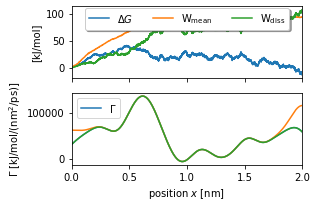

In [ ]:
from dcTMD.storing import WorkSet
from dcTMD.dcTMD import WorkEstimator

workset = WorkSet(velocity=velocity,
                  resolution=res,
                  verbose=False,
                  )
workset.fit(filenames)
workestimator = WorkEstimator(temperature)
workestimator.fit(workset)

x = workestimator.work_set.position_
fig, axs = plot_dcTMD_results(x, workestimator, smooth_friction_)
smooth_friction_ = gaussfilter_friction(workestimator.friction_,
                                        x,
                                        0.1,
                                        )
plot_Gamma(x, smooth_friction_, axs[1], label="$\Gamma$_{smooth}")
smooth_friction_ = gaussfilter_friction(workestimator.friction_,
                                        x,
                                        0.1,
                                        'constant')
plot_Gamma(x, smooth_friction_, axs[1], label="$\Gamma$_{smooth}")